In [183]:
import polars as pl
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Первичная обработка данных

In [184]:
df = pl.read_excel('./data/24MAG_HW_1_v14.xls', has_header=False)
df = df.rename(dict(zip([f"column_{i}" for i in range(1,7)],
                   ['age', 'num_dependants', 'income', 'years_in_region', 'car_value', 'credit_value'])))
df

age,num_dependants,income,years_in_region,car_value,credit_value
i64,i64,i64,i64,i64,i64
37,2,29900,7,30000,297000
29,0,1500,5,0,4000
33,2,25200,6,null,248000
28,1,24900,3,24000,241000
47,2,8800,15,9000,92000
…,…,…,…,…,…
19,2,8000,12,50000,200000
40,2,14500,10,14000,144000
null,2,12600,15,13000,130000


In [185]:
df.describe()

statistic,age,num_dependants,income,years_in_region,car_value,credit_value
str,f64,f64,f64,f64,f64,f64
"""count""",49.0,49.0,49.0,50.0,50.0,50.0
"""null_count""",3.0,3.0,3.0,2.0,2.0,2.0
"""mean""",38.632653,1.979592,19808.163265,10.12,20920.0,200586.0
"""std""",8.661923,0.989314,10269.490346,4.930703,11527.854465,99386.004866
"""min""",19.0,0.0,1500.0,0.0,0.0,4000.0
"""25%""",33.0,1.0,12100.0,6.0,13000.0,128000.0
"""50%""",39.0,2.0,16800.0,11.0,19000.0,200000.0
"""75%""",46.0,3.0,29200.0,14.0,30000.0,293000.0
"""max""",56.0,4.0,43300.0,19.0,50000.0,437000.0


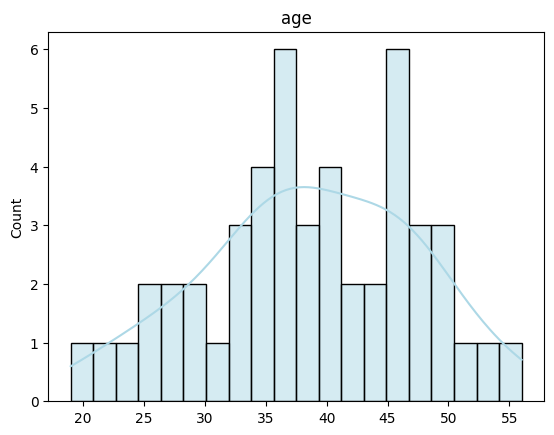

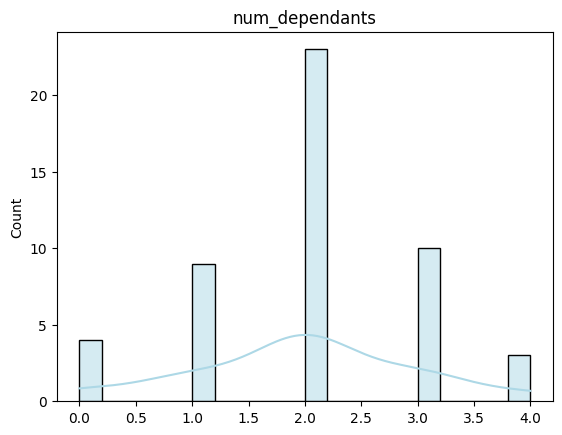

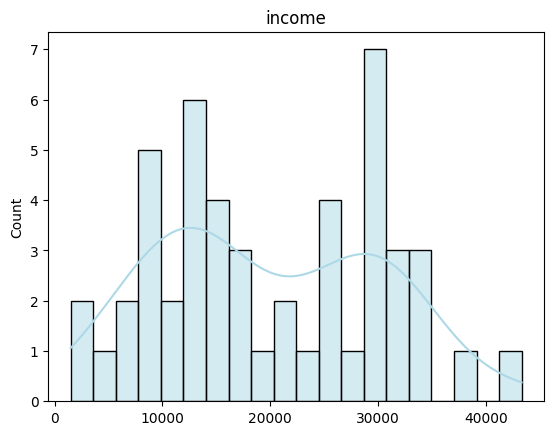

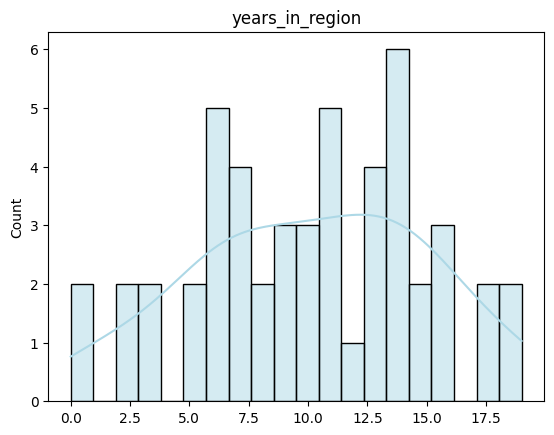

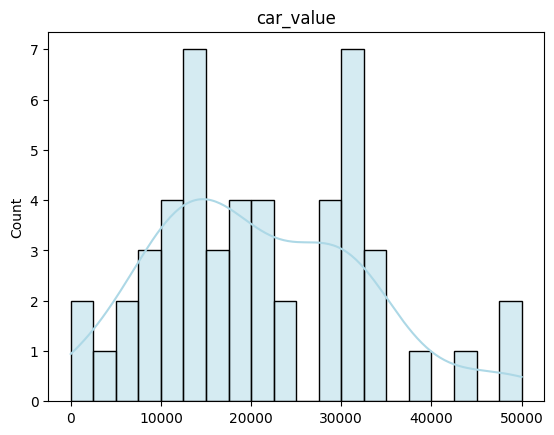

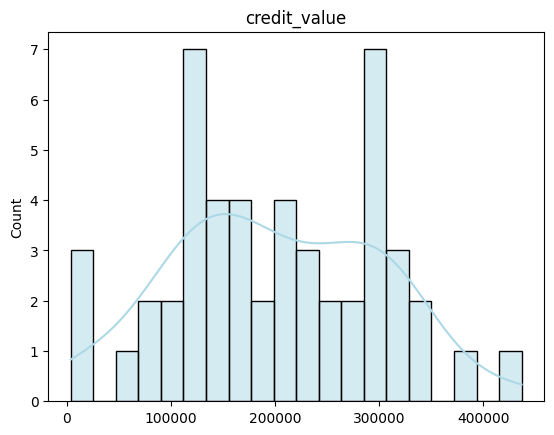

In [186]:
for col_name in df.columns:
    sns.histplot(df[col_name], bins=20, kde=True, color='lightblue', edgecolor='black')
    plt.title(col_name)
    plt.show()

In [187]:
df = df.fill_null(strategy='mean')

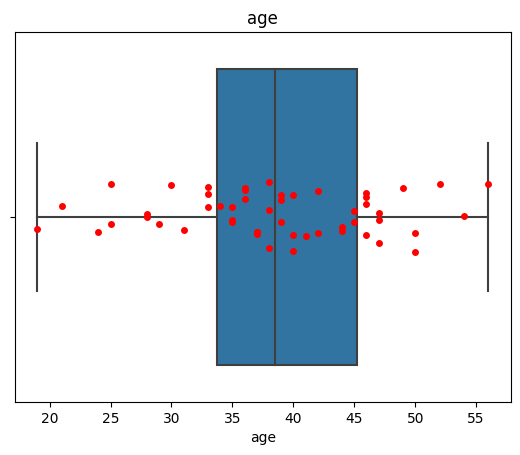

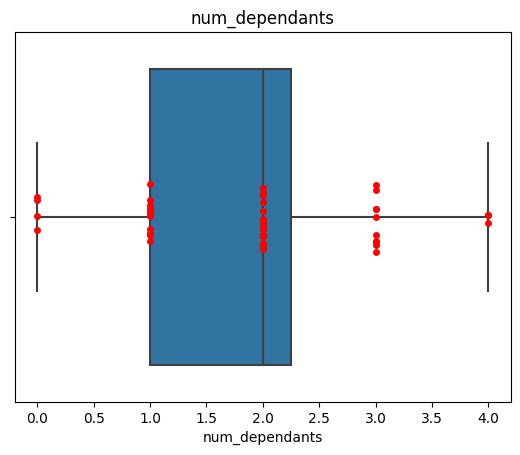

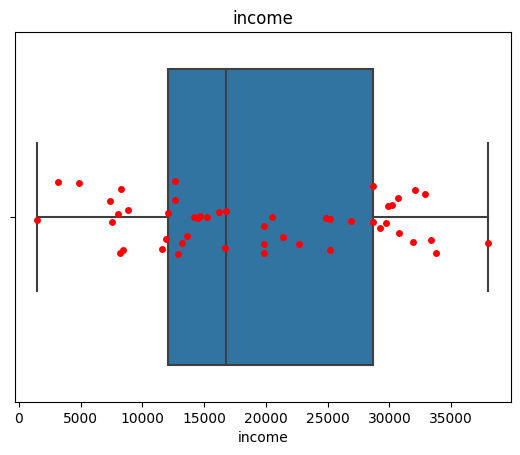

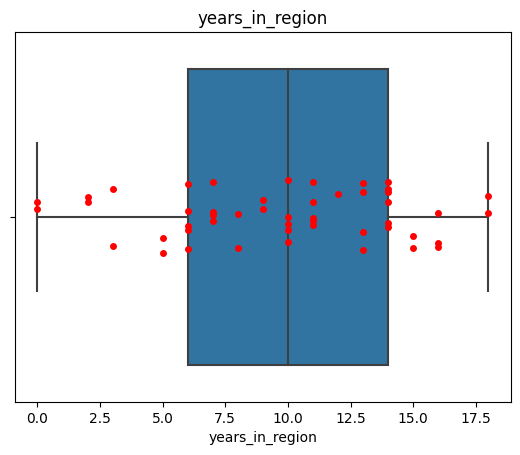

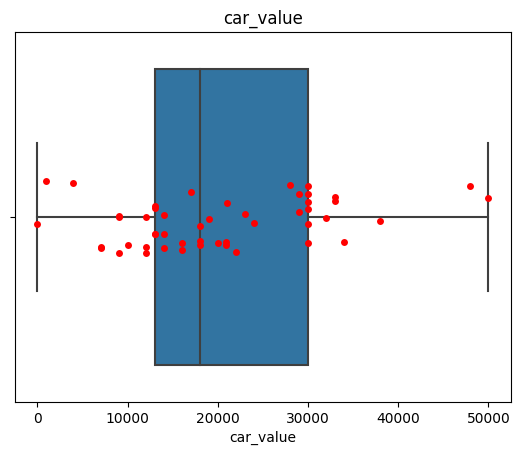

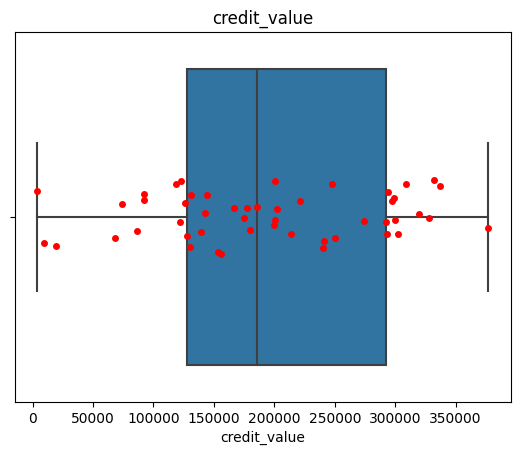

In [188]:
for col_name in df.columns:
    plt.title(col_name)
    sns.boxplot(x=df[col_name])
    sns.stripplot(x=df[col_name], color='red')
    plt.show()

    Q1 = df[col_name].quantile(0.25)
    Q3 = df[col_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df = df.filter((pl.col(col_name) >= lower_bound) & (pl.col(col_name) <= upper_bound))



In [189]:
df

age,num_dependants,income,years_in_region,car_value,credit_value
i64,i64,i64,i64,i64,i64
37,2,29900,7,30000,297000
29,0,1500,5,0,4000
33,2,25200,6,20920,248000
28,1,24900,3,24000,241000
47,2,8800,15,9000,92000
…,…,…,…,…,…
19,2,8000,12,50000,200000
40,2,14500,10,14000,144000
38,2,12600,15,13000,130000


# 2. Снижение размерности. Метод PCA 

Центрирование и нормировка

In [190]:
for col_name in df.columns:
    df = df.with_columns((pl.col(col_name) - df[col_name].mean()).alias(col_name))
    df = df.with_columns((pl.col(col_name) / np.linalg.norm(df[col_name].to_numpy())).alias(col_name))

In [191]:
df.describe()

statistic,age,num_dependants,income,years_in_region,car_value,credit_value
str,f64,f64,f64,f64,f64,f64
"""count""",49.0,49.0,49.0,49.0,49.0,49.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",-8.2700e-17,-1.1329e-17,2.2658e-18,0.0,-4.5315e-18,4.5315e-18
"""std""",0.144338,0.144338,0.144338,0.144338,0.144338,0.144338
"""min""",-0.334995,-0.29949,-0.265158,-0.305108,-0.263881,-0.292941
"""25%""",-0.09052,-0.132728,-0.10644,-0.117839,-0.094747,-0.101932
"""50%""",-0.003207,0.034033,-0.036066,0.007007,-0.029695,-0.012589
"""75%""",0.11903,0.034033,0.142117,0.131852,0.126428,0.150692
"""max""",0.276193,0.200794,0.281369,0.256698,0.386635,0.281626


Найдем SVD разложение

In [192]:
Z = df.to_numpy()

In [193]:
U, S, VT = np.linalg.svd(df.to_numpy())

Найдем ошибки аппроксимации в спектральной норме и в норме Фробениуса и построим их графики зависимости от количества сингулярных чисел

In [197]:
frobenius_errors = []
spectral_errors = []

for i in range(len(S)):
    S_n = S.copy()
    S_n = S_n[:i+1]
    # S_n[i+1:] = np.zeros_like(S_n[i+1:])
    S_n = np.concatenate([np.diag(S_n), np.zeros([U.shape[0] - (i + 1), i + 1])], axis=0)
    
    Z_approx = U @ S_n @ VT[:i+1, ...]
    
    frobenius_errors.append(np.linalg.norm(Z - Z_approx, ord='fro'))
    spectral_errors.append(np.linalg.norm(Z - Z_approx, ord=2))
    
    # print(U.shape, S_n.shape, VT[:i+1, ...].shape, sep=' ')
    # print(Z_approx.shape)
    

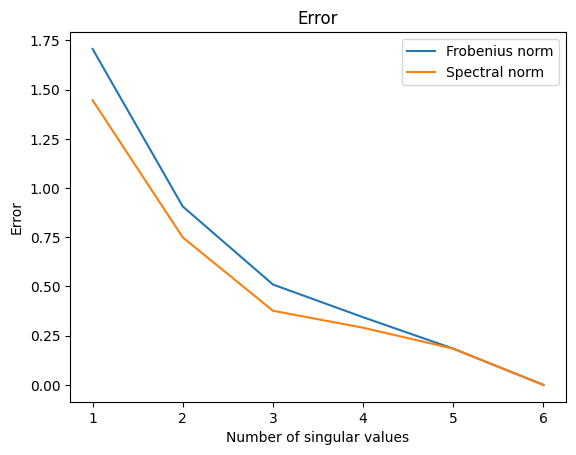

In [195]:
plt.plot(range(1, len(frobenius_errors) + 1), frobenius_errors, label='Frobenius norm')
plt.plot(range(1, len(spectral_errors) + 1), spectral_errors, label='Spectral norm')
plt.title('Error')
plt.xlabel('Number of singular values')
plt.ylabel('Error')
plt.legend()